#Worcester Crash Reports

This project is based on the vehicular crash reports from the Worcester County. Using the mapping tool from the MASSDOT [crash portal](http://services.massdot.state.ma.us/crashportal/CrashMapPage.aspx?Mode=Mapping). I tried to grab all the data I could get, but since you could only get 8000 results at once, I had to do it multiple times to get the entire city of Worcester's data.

In [1]:
import pandas as pd #For Data Cleaning and Manipulation
import matplotlib.pyplot as plt #Data analysis by plotting
import glob #Used as a way to open all csv files that were collected
import datetime #used to clean and better express the Date and Time features
from matplotlib.dates import date2num

Joining all csv files into one dataframe
Since I had to download multiple csv files, I needed to combine all of them into one data. I could of open them one by one and assigning them to a dataframe, but I decided to look around for a solution into reading all the csv files and then concatinating it into a bigger csv file. I then decided to remove all the duplicates if there was any, so that we  wouldn't have repeated data.

In [2]:
worcester_crashreports = glob.glob("*.csv") 
df = pd.concat((pd.read_csv(f, header = 0, low_memory=False) for f in worcester_crashreports), sort= False)
df_worcrash = df.drop_duplicates()
#df_worcrash.to_csv("Worces.csv")

In [3]:
df_worcrash.head(5) #Just looking at what our data looks like.

,Crash Number,Crash Date,Crash Time,City/Town,Crash Severity,Roadway,Near Intersection Roadway,Landmark,Police Agency,Unnamed: 0
0,4051393,3/24/2015,11:47 AM,WORCESTER,Non-fatal injury,SALISBURY STREET / WESTWOOD DRIVE,NaN,NaN,Local police,NaN
1,4051388,3/24/2015,2:25 PM,WORCESTER,Property damage only (none injured),CAMELOT DRIVE,NaN,NaN,Local police,NaN
2,4054884,2/26/2015,11:10 AM,WORCESTER,Property damage only (none injured),CHESTER STREET,NaN,NaN,Local police,NaN
3,2790347,11/1/2011,8:25 PM,WORCESTER,Property damage only (none injured),Rte 190 S,NaN,NaN,State police,NaN
4,4054867,2/26/2015,8:29 PM,WORCESTER,Property damage only (none injured),MOUNTAIN STREET WEST / BROOKS STREET,NaN,NaN,Local police,NaN


##Data Cleaning and Manipulation

Renaming the Columns for easier syntax

In [4]:
df_worcrash = df.rename(columns = {'Crash Date':'CrashDate','Crash Time':'CrashTime', 'Crash Severity':'CrashSev', 'Police Agency':'PoliceAgency'})

In [5]:
df_worcrash.head(9)

,Crash Number,CrashDate,CrashTime,City/Town,CrashSev,Roadway,Near Intersection Roadway,Landmark,PoliceAgency,Unnamed: 0
0,4051393,3/24/2015,11:47 AM,WORCESTER,Non-fatal injury,SALISBURY STREET / WESTWOOD DRIVE,NaN,NaN,Local police,NaN
1,4051388,3/24/2015,2:25 PM,WORCESTER,Property damage only (none injured),CAMELOT DRIVE,NaN,NaN,Local police,NaN
2,4054884,2/26/2015,11:10 AM,WORCESTER,Property damage only (none injured),CHESTER STREET,NaN,NaN,Local police,NaN
3,2790347,11/1/2011,8:25 PM,WORCESTER,Property damage only (none injured),Rte 190 S,NaN,NaN,State police,NaN
4,4054867,2/26/2015,8:29 PM,WORCESTER,Property damage only (none injured),MOUNTAIN STREET WEST / BROOKS STREET,NaN,NaN,Local police,NaN
5,4055722,2/19/2015,3:58 PM,WORCESTER,Property damage only (none injured),CHESTER STREET,NaN,NaN,Local police,NaN
6,4055774,5/17/2015,1:00 PM,WORCESTER,Non-fatal injury,WEST BOYLSTON STREET / WEST BOYLSTON DRIVE,NaN,NaN,Local police,NaN
7,2790266,11/1/2011,10:00 PM,WORCESTER,Non-fatal injury,Rte 190 N,NaN,NaN,State police,NaN
8,2791027,7/1/2010,00:98 AM,WORCESTER,Not Reported,BLUEBELL ROAD,NaN,NaN,Local police,NaN


Checking whether I grabbed some data from other towns

In [6]:
df_worcrash['City/Town'].unique()

array(['WORCESTER', 'WEST BOYLSTON', 'HOLDEN', 'GRAFTON', nan,
       'SHREWSBURY', 'HUDSON', 'LEICESTER', 'MILLBURY', 'AUBURN',
       'LEOMINSTER'], dtype=object)

In [7]:
df_worcrash = df_worcrash[df_worcrash['City/Town'] == 'WORCESTER'] #Only selecting Worcester from the files

In [8]:
df_worcrash.head(5) #This is what the data looks like now.

,Crash Number,CrashDate,CrashTime,City/Town,CrashSev,Roadway,Near Intersection Roadway,Landmark,PoliceAgency,Unnamed: 0
0,4051393,3/24/2015,11:47 AM,WORCESTER,Non-fatal injury,SALISBURY STREET / WESTWOOD DRIVE,NaN,NaN,Local police,NaN
1,4051388,3/24/2015,2:25 PM,WORCESTER,Property damage only (none injured),CAMELOT DRIVE,NaN,NaN,Local police,NaN
2,4054884,2/26/2015,11:10 AM,WORCESTER,Property damage only (none injured),CHESTER STREET,NaN,NaN,Local police,NaN
3,2790347,11/1/2011,8:25 PM,WORCESTER,Property damage only (none injured),Rte 190 S,NaN,NaN,State police,NaN
4,4054867,2/26/2015,8:29 PM,WORCESTER,Property damage only (none injured),MOUNTAIN STREET WEST / BROOKS STREET,NaN,NaN,Local police,NaN


Changing our data set and only selecting specific columns. Seems like were not gonna need the City/Town, Landmark and Near Intersection Roadway features since its mostly not available.

In [9]:
df_worcrash = df_worcrash[[ 'CrashDate','CrashTime', 'CrashSev','PoliceAgency','Roadway']]

In [10]:
df_worcrash.head(10)

,CrashDate,CrashTime,CrashSev,PoliceAgency,Roadway
0,3/24/2015,11:47 AM,Non-fatal injury,Local police,SALISBURY STREET / WESTWOOD DRIVE
1,3/24/2015,2:25 PM,Property damage only (none injured),Local police,CAMELOT DRIVE
2,2/26/2015,11:10 AM,Property damage only (none injured),Local police,CHESTER STREET
3,11/1/2011,8:25 PM,Property damage only (none injured),State police,Rte 190 S
4,2/26/2015,8:29 PM,Property damage only (none injured),Local police,MOUNTAIN STREET WEST / BROOKS STREET
5,2/19/2015,3:58 PM,Property damage only (none injured),Local police,CHESTER STREET
6,5/17/2015,1:00 PM,Non-fatal injury,Local police,WEST BOYLSTON STREET / WEST BOYLSTON DRIVE
7,11/1/2011,10:00 PM,Non-fatal injury,State police,Rte 190 N
8,7/1/2010,00:98 AM,Not Reported,Local police,BLUEBELL ROAD
9,5/19/2010,10:30 AM,Property damage only (none injured),Local police,WEST BOYLSTON STREET


Looking at the data, I noticed some of them have a time '00:98' which doesn't not make sense, so I turned them to '1:30'

In [11]:
df_worcrash.loc[df_worcrash['CrashTime'] == '00:98 AM', 'CrashTime' ] = '01:30 AM'

Combining the CrashDate and CrashTime to make a datetime property

In [12]:
df_worcrash['CrashDT'] = df_worcrash['CrashDate'] + ' ' + df_worcrash['CrashTime']
df_worcrash.head(5)

,CrashDate,CrashTime,CrashSev,PoliceAgency,Roadway,CrashDT
0,3/24/2015,11:47 AM,Non-fatal injury,Local police,SALISBURY STREET / WESTWOOD DRIVE,3/24/2015 11:47 AM
1,3/24/2015,2:25 PM,Property damage only (none injured),Local police,CAMELOT DRIVE,3/24/2015 2:25 PM
2,2/26/2015,11:10 AM,Property damage only (none injured),Local police,CHESTER STREET,2/26/2015 11:10 AM
3,11/1/2011,8:25 PM,Property damage only (none injured),State police,Rte 190 S,11/1/2011 8:25 PM
4,2/26/2015,8:29 PM,Property damage only (none injured),Local police,MOUNTAIN STREET WEST / BROOKS STREET,2/26/2015 8:29 PM


In [13]:
df_worcrash['CrashDT'] = pd.to_datetime(df_worcrash['CrashDT'], format = '%m/%d/%Y %I:%M %p')

It might also be helpful to know the days of the week for our analysis.
Checking how far the records where could also help us down the road.

In [14]:
df_worcrash['DayOfWeek'] = df_worcrash['CrashDT'].dt.weekday

In [15]:
df_worcrash = df_worcrash[['CrashDT', 'DayOfWeek', 'CrashSev', 'PoliceAgency', 'Roadway']] #Just another clean up. This looks much better now.
df_worcrash.head(5)
print( min(df_worcrash['CrashDT']) )
print( max(df_worcrash['CrashDT']) )

1966-11-08 15:45:00
2016-12-31 23:00:00


 ##Data Analysis

Now, let us  see which day of the week has the most crash reports.

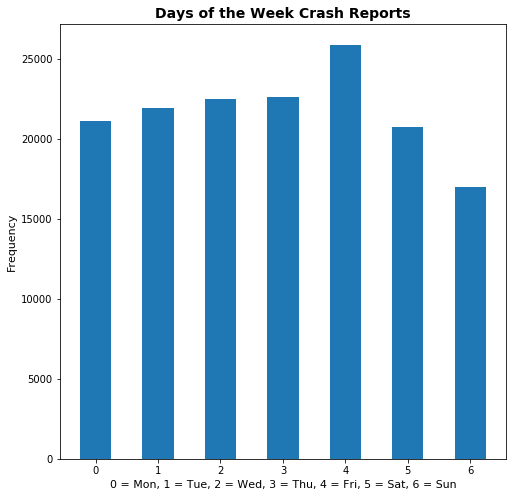

In [17]:
day_edges = [-.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
xlabel = '0 = Mon, 1 = Tue, 2 = Wed, 3 = Thu, 4 = Fri, 5 = Sat, 6 = Sun'
plt.gcf().set_size_inches(8,8)
plt.hist(df_worcrash.DayOfWeek, align = 'mid', bins = day_edges, rwidth = .5)
plt.xlabel(xlabel, fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.title('Days of the Week Crash Reports', fontweight = 'bold', fontsize = 14)
plt.show()

Looking at the data, the distribution of reports seems pretty normal. Although, we can see that the weekends, Saturday and Sunday seems to have a lower report rate. And that Friday has the highest. 
This might be because most people do not work during the weekends and some are trying to rush home on Fridays. 

I tried using the function weekday_name to get the actual words i.g "Monday", but it takes a really long time to graph them and so I just decided that it would be better to just leave it as numbers.

In [18]:
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 0, 'DayOfWeek' ] = 'M'
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 1, 'DayOfWeek' ] = 'T'
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 2, 'DayOfWeek' ] = 'W'
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 3, 'DayOfWeek' ] = 'Th'
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 4, 'DayOfWeek' ] = 'F'
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 5, 'DayOfWeek' ] = 'S'
#df_worcrash.loc[df_worcrash['DayOfWeek'] == 6, 'DayOfWeek' ] = 'Su'

Another thing that we could do is graph the date and the number of reports as well.

Text(0.5,1,'Number of Reports in Months')

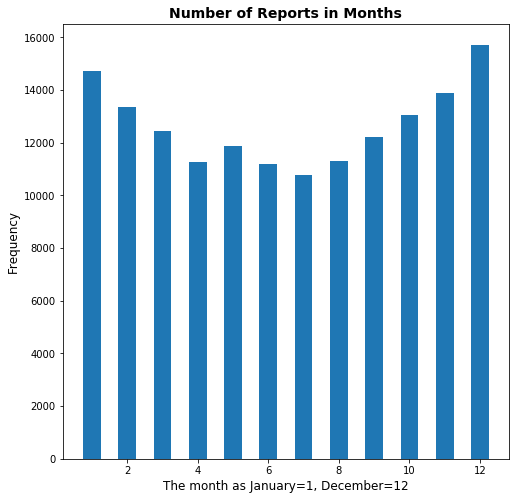

In [29]:
month_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5]
df_worcrash['Month'] = df_worcrash['CrashDT'].dt.month
month = df_worcrash.Month
plt.gcf().set_size_inches(8,8)
plt.hist(month, bins = month_edges, align = 'mid', rwidth = 0.5)
plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('The month as January=1, December=12', fontsize = 12)
plt.title('Number of Reports in Months',fontweight = 'bold', fontsize = 14)

This is actually interesting. I would've thought that the number of accidents would be higher in the snow months, but not really. The month with the highest reports are January and December, months when it doesn't really snow a lot. 

Let us also check which police agency the crash was reported to.

In [32]:
df_worcrash['PoliceAgency'].unique()

array(['Local police', 'State police', nan, 'Other', 'MBTA police'],
      dtype=object)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

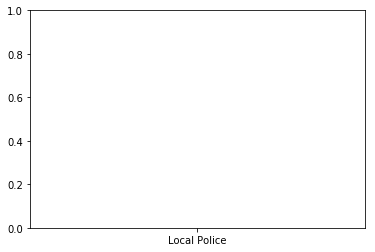

In [52]:
LPcount = df_worcrash['PoliceAgency'].str.count('Local police')
MBTAcount = df_worcrash['PoliceAgency'].str.count('MBTA police')
SPcount = df_worcrash['PoliceAgency'].str.count('State police')
Othercount = df_worcrash['PoliceAgency'].str.count('Other')
NaNcount = df_worcrash['PoliceAgency'].str.count('NaN')
agency = ['Local Police', 'State Police', 'MBTA Police', 'Other', 'NaN']
plt.bar(agency, LPcount, color = 'darkblue', label = 'Local Police')
plt.bar(agency, SPcount, color = 'cyan', label = 'State Police')
plt.bar(agency, MBTAcount, color = 'blue', label = 'MBTA Police')
plt.bar(agency, Othercount, color = 'green', label = 'Other')
plt.bar(agency, NaNcount, color = 'red', label = 'Not Available')
plt.gcf().set_size_inches(8,8)
plt.legend()